In [1]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [123]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
# import seaborn as sns
# sns.set()
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer

from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier


In [3]:
filenames = {
    "emulab_hdd_merged": "emulab_d460_10Gbps_hdd_merged_v2.csv",
    "emulab_hdd_unmerged": "emulab_d460_10Gbps_hdd_unmerged_v2.csv",

    "utah_ssd_merged": "utah_c6525-25g_25Gbps_ssd_merged_V2.csv",
    "utah_ssd_unmerged": "utah_c6525-25g_25Gbps_ssd_unmerged_V2.csv",

    "wisconsin_ssd_merged": "wisconsin_c220g1-10Gbps_ssd_merged_V2.csv",
    "wisconsin_ssd_unmerged": "wisconsin_c220g1-10Gbps_ssd_unmerged_V2.csv",

    "utah_ssd_merged_1g": "utah_c6525-25g_1Gbps_ssd_merged_V2.csv",
    "utah_ssd_unmerged_1g": "utah_c6525-25g_1Gbps_ssd_unmerged_V2.csv",
}


In [4]:
emulab_hdd_merged = pd.read_csv(filenames.get('emulab_hdd_merged')).drop(['time_stamp', 'through_put'], axis=1)

utah_ssd_merged = pd.read_csv(filenames.get('utah_ssd_merged')).drop(['time_stamp', 'through_put'], axis=1)


In [22]:
df = emulab_hdd_merged
# np.round((sum(sum((df == 0).values))) / (len(df) * len(df.columns)),3)
df.shape

(41313, 117)

In [24]:
# df
len(dict(Counter(df[df.columns[len(df.columns) - 1]])))

21

In [16]:
y = df.label_value
X = df.drop(columns="label_value") # df[features]
X_train, X_test, y_train, y_test = train_test_split(X,y)
print(X_train.shape)
X_train, y_train = RandomUnderSampler(sampling_strategy="all").fit_resample(X_train, y_train)
print(X_train.shape)
clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(np.round(metrics.accuracy_score(y_test, y_pred) * 100, 2))
# print(metrics.confusion_matrix(y_test, y_pred))
score = np.round(clf.feature_importances_, 2)

# print(sorted(list(score), reverse=True))
print("Cummulative Importance Score: \n", np.cumsum(sorted(list(score), reverse=True)))
print(Counter(score))

(30984, 116)
(3906, 116)
95.67
Cummulative Importance Score: 
 [0.05 0.1  0.14 0.18 0.21 0.24 0.27 0.3  0.33 0.35 0.37 0.39 0.41 0.43
 0.45 0.47 0.49 0.51 0.53 0.55 0.57 0.59 0.61 0.63 0.64 0.65 0.66 0.67
 0.68 0.69 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81
 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95
 0.96 0.97 0.98 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99
 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99
 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99
 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99
 0.99 0.99 0.99 0.99]
Counter({0.0: 56, 0.01: 36, 0.02: 15, 0.03: 5, 0.05: 2, 0.04: 2})


In [18]:
features = []
for i in range(len(score)):
    if score[i] >= 0.02:
        features.append(X.columns[i])
        # print(df.columns[i])
print(features)
print(len(features))


['sender_avg_rtt_value', 'sender_pacing_rate', 'sender_cwnd_rate', 'sender_retrans', 'sender_ssthresh_value', 'sender_segs_in', 'sender_avg_send_value', 'sender_tcp_snd_buffer_min', 'sender_tcp_snd_buffer_max', 'sender_req_active', 'sender_ost_write', 'sender_avg_waittime_md', 'sender_system_cpu_percent', 'sender_remote_ost_write_bytes', 'receiver_seg_out', 'receiver_segs_in', 'receiver_cpu_usage_percentage', 'receiver_req_active', 'receiver_ost_write', 'receiver_avg_waittime_md', 'receiver_system_cpu_percent', 'receiver_system_memory_percent', 'receiver_remote_ost_read_bytes', 'receiver_remote_ost_write_bytes']
24


In [130]:
features = ['sender_avg_rtt_value', 'sender_cwnd_rate', 'sender_retrans', 'sender_ssthresh_value', 'sender_segs_in', 'sender_avg_send_value', 'sender_tcp_snd_buffer_min', 'sender_tcp_snd_buffer_max', 'sender_req_active', 'sender_write_bytes', 'sender_avg_waittime_md', 'sender_system_cpu_percent', 'sender_remote_ost_write_bytes', 'receiver_seg_out', 'receiver_segs_in', 'receiver_req_waittime', 'receiver_req_active', 'receiver_write_bytes', 'receiver_ost_write', 'receiver_avg_waittime_md', 'receiver_system_cpu_percent', 'receiver_system_memory_percent', 'receiver_remote_ost_read_bytes', 'receiver_remote_ost_write_bytes']

In [131]:
features_2 =['sender_avg_rtt_value', 'sender_cwnd_rate', 'sender_seg_out', 'sender_ssthresh_value', 'sender_segs_in', 'sender_avg_send_value', 'sender_vsize', 'sender_rss', 'sender_mem_usage_percentage', 'sender_avg_waittime_md', 'sender_system_cpu_percent', 'receiver_seg_out', 'receiver_segs_in', 'receiver_read_bytes_io', 'receiver_vsize', 'receiver_rss', 'receiver_mem_usage_percentage', 'receiver_req_active', 'receiver_avg_waittime_md', 'receiver_system_cpu_percent']

In [20]:
y_new = df.label_value
X_new = df[features] #.drop(columns="label_value")
X_train, X_test, y_train, y_test = train_test_split(X_new,y_new)
print(X_train.shape)
X_train, y_train = RandomUnderSampler(sampling_strategy="all").fit_resample(X_train, y_train)
print(X_train.shape)
clf_new = RandomForestClassifier(n_estimators=100)
# clf = make_pipeline(StandardScaler(), SVC())
# clf = SVC()
clf_new.fit(X_train, y_train)
y_pred = clf_new.predict(X_test)
print(np.round(metrics.accuracy_score(y_test, y_pred) * 100, 2))

(30984, 24)
(3948, 24)
95.67


## TEST WITH DIFFERENT CLASSIFIRES MEREGD LEVELS -

In [82]:
datasets = ['emulab_hdd_merged', 'utah_ssd_merged', 'wisconsin_ssd_merged', 'utah_ssd_merged_1g']
classifiers = {"RandomForest": RandomForestClassifier(n_estimators=100),
           "DecisionTreeClassifier": DecisionTreeClassifier(),
           "SVM": svm.SVC(),
           "MLPNeuralNetwork": MLPClassifier(),
           # "XGB": XGBClassifier(),
        }
classifiers_legends = list(classifiers.keys())
all_accuracies = {}
round_number = 10

for clf_key in classifiers:
    accuracies = np.zeros(len(classifiers_legends))
    for i in range(round_number):
        temp_acc = np.array([])
        for key in datasets:
            print("run {} model for dataset: {}".format(clf_key.replace("\n", " "), key))
            df = pd.read_csv(filenames.get(key)).drop(['time_stamp', 'through_put'], axis=1)
            y = df.label_value
            X = df.drop(columns="label_value")[features] # df[features]
            X_train, X_test, y_train, y_test = train_test_split(X,y)
            # print(X_train.shape)
            X_train, y_train = RandomUnderSampler(sampling_strategy="all").fit_resample(X_train, y_train)
            # print(X_train.shape)
            clf = classifiers[clf_key]
            clf = make_pipeline(StandardScaler(), clf)
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            accuracy = np.round(metrics.accuracy_score(y_test, y_pred) * 100, 2)
            temp_acc = np.append(temp_acc, accuracy)
        accuracies = np.add(accuracies, temp_acc)
    print("\n")
    accuracies = accuracies / round_number
    all_accuracies[clf_key] = accuracies

print(classifiers_legends)
print(datasets)
print(all_accuracies)

run RandomForest model for dataset: emulab_hdd_merged
run RandomForest model for dataset: utah_ssd_merged
run RandomForest model for dataset: wisconsin_ssd_merged
run RandomForest model for dataset: utah_ssd_merged_1g


run DecisionTreeClassifier model for dataset: emulab_hdd_merged
run DecisionTreeClassifier model for dataset: utah_ssd_merged
run DecisionTreeClassifier model for dataset: wisconsin_ssd_merged
run DecisionTreeClassifier model for dataset: utah_ssd_merged_1g


run SVM model for dataset: emulab_hdd_merged
run SVM model for dataset: utah_ssd_merged
run SVM model for dataset: wisconsin_ssd_merged
run SVM model for dataset: utah_ssd_merged_1g


run MLPNeuralNetwork model for dataset: emulab_hdd_merged
run MLPNeuralNetwork model for dataset: utah_ssd_merged
run MLPNeuralNetwork model for dataset: wisconsin_ssd_merged
run MLPNeuralNetwork model for dataset: utah_ssd_merged_1g


['RandomForest', 'DecisionTreeClassifier', 'SVM', 'MLPNeuralNetwork']
['emulab_hdd_merged', 'utah_ss

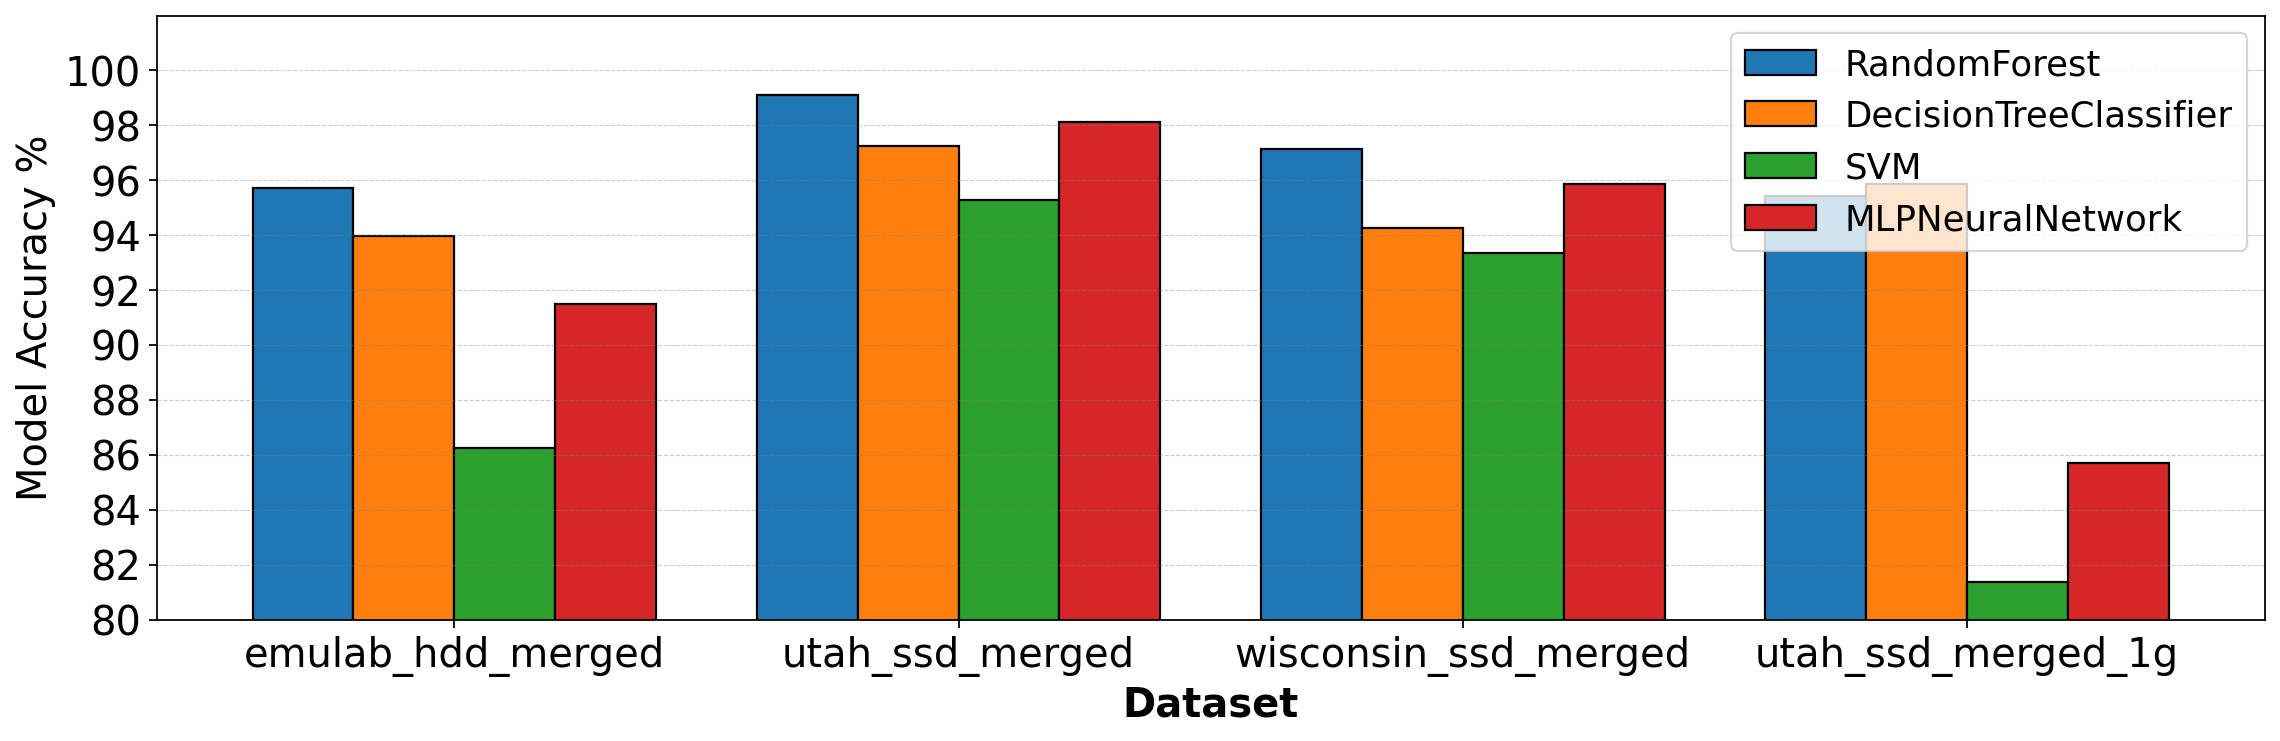

In [108]:
plt.rcParams.update({'font.size': 18})
# Figure Size
fig, ax = plt.subplots(figsize =(17, 5), dpi=160)
barWidth = 0.2

# Set position of bar on X axis
br1 = np.arange(len(datasets))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]

ax.grid(visible = True, axis='y', color ='grey', linestyle ='--', linewidth = 0.5, alpha = 0.4)
ax.set_ylabel('Model Accuracy %')
ax.set_ylim(ymin=80, ymax=102)


ax.bar(br1, all_accuracies['RandomForest'], width = barWidth, edgecolor ='black', label="RandomForest")
ax.bar(br2, all_accuracies['DecisionTreeClassifier'], width = barWidth, edgecolor ='black', label="DecisionTreeClassifier")
ax.bar(br3, all_accuracies['SVM'], width = barWidth, edgecolor ='black', label="SVM")
ax.bar(br4, all_accuracies['MLPNeuralNetwork'], width = barWidth, edgecolor ='black', label="MLPNeuralNetwork")


plt.xlabel('Dataset', fontweight ='bold')
plt.yticks(np.arange(80, 101, 2))
plt.xticks([r + 0.3 for r in range(len(br1))], datasets)

plt.legend(fontsize = 16)


## TEST WITH DIFFERENT CLASSIFIRES UNMERGED LEVELS - 161 labels

In [ ]:
df = pd.read_csv(filenames.get('emulab_hdd_unmerged')).drop(['time_stamp', 'through_put'], axis=1)
df.shape
print(len(dict(Counter(df[df.columns[len(df.columns) - 1]]))))
y = df.label_value
X = df.drop(columns="label_value")[features_2] # df[features]
# X = df.drop(columns="label_value")[features] # df[features]
# X = df.drop(columns="label_value") # df[features]
X_train, X_test, y_train, y_test = train_test_split(X,y)
# print(X_train.shape)
X_train, y_train = RandomUnderSampler(sampling_strategy="all").fit_resample(X_train, y_train)
print(X_train.shape)
clf = RandomForestClassifier(n_estimators=100)
# clf = make_pipeline(StandardScaler(), SVC())
# clf = SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(np.round(metrics.accuracy_score(y_test, y_pred) * 100, 2))


In [143]:
datasets = ['emulab_hdd_unmerged', 'utah_ssd_unmerged', 'wisconsin_ssd_unmerged', 'utah_ssd_unmerged_1g']
classifiers = {"RandomForest": RandomForestClassifier(n_estimators=100),
           "DecisionTreeClassifier": DecisionTreeClassifier(),
           "SVM": svm.SVC(),
           "MLPNeuralNetwork": MLPClassifier(),
           # "XGB": XGBClassifier(),
        }
classifiers_legends = list(classifiers.keys())
all_accuracies = {}
round_number = 1
for clf_key in classifiers:
    accuracies = np.zeros(len(classifiers_legends))
    for i in range(round_number):
        temp_acc = np.array([])
        for key in datasets:
            print("run {} model for dataset: {}".format(clf_key.replace("\n", " "), key))
            df = pd.read_csv(filenames.get(key)).drop(['time_stamp', 'through_put'], axis=1)
            y = df.label_value
            X = df.drop(columns="label_value")[features_2]#[features] # df[features]
            X_train, X_test, y_train, y_test = train_test_split(X,y)
            # print(X_train.shape)
            X_train, y_train = RandomUnderSampler(sampling_strategy="all").fit_resample(X_train, y_train)
            # print(X_train.shape)
            clf = classifiers[clf_key]
            clf = make_pipeline(StandardScaler(), clf)
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            accuracy = np.round(metrics.accuracy_score(y_test, y_pred) * 100, 2)
            print(accuracy)
            temp_acc = np.append(temp_acc, accuracy)
        accuracies = np.add(accuracies, temp_acc)
    print("\n")
    accuracies = accuracies / round_number
    all_accuracies[clf_key] = accuracies

print(classifiers_legends)
print(datasets)
print(all_accuracies)

run RandomForest model for dataset: emulab_hdd_unmerged
93.86
run RandomForest model for dataset: utah_ssd_unmerged
93.86
run RandomForest model for dataset: wisconsin_ssd_unmerged
87.74
run RandomForest model for dataset: utah_ssd_unmerged_1g
49.19


run DecisionTreeClassifier model for dataset: emulab_hdd_unmerged
85.63
run DecisionTreeClassifier model for dataset: utah_ssd_unmerged
88.52
run DecisionTreeClassifier model for dataset: wisconsin_ssd_unmerged
78.83
run DecisionTreeClassifier model for dataset: utah_ssd_unmerged_1g
53.49


run SVM model for dataset: emulab_hdd_unmerged
72.93
run SVM model for dataset: utah_ssd_unmerged
68.15
run SVM model for dataset: wisconsin_ssd_unmerged
61.67
run SVM model for dataset: utah_ssd_unmerged_1g
24.97


run MLPNeuralNetwork model for dataset: emulab_hdd_unmerged
97.2
run MLPNeuralNetwork model for dataset: utah_ssd_unmerged
95.73
run MLPNeuralNetwork model for dataset: wisconsin_ssd_unmerged
88.96
run MLPNeuralNetwork model for dataset: ut

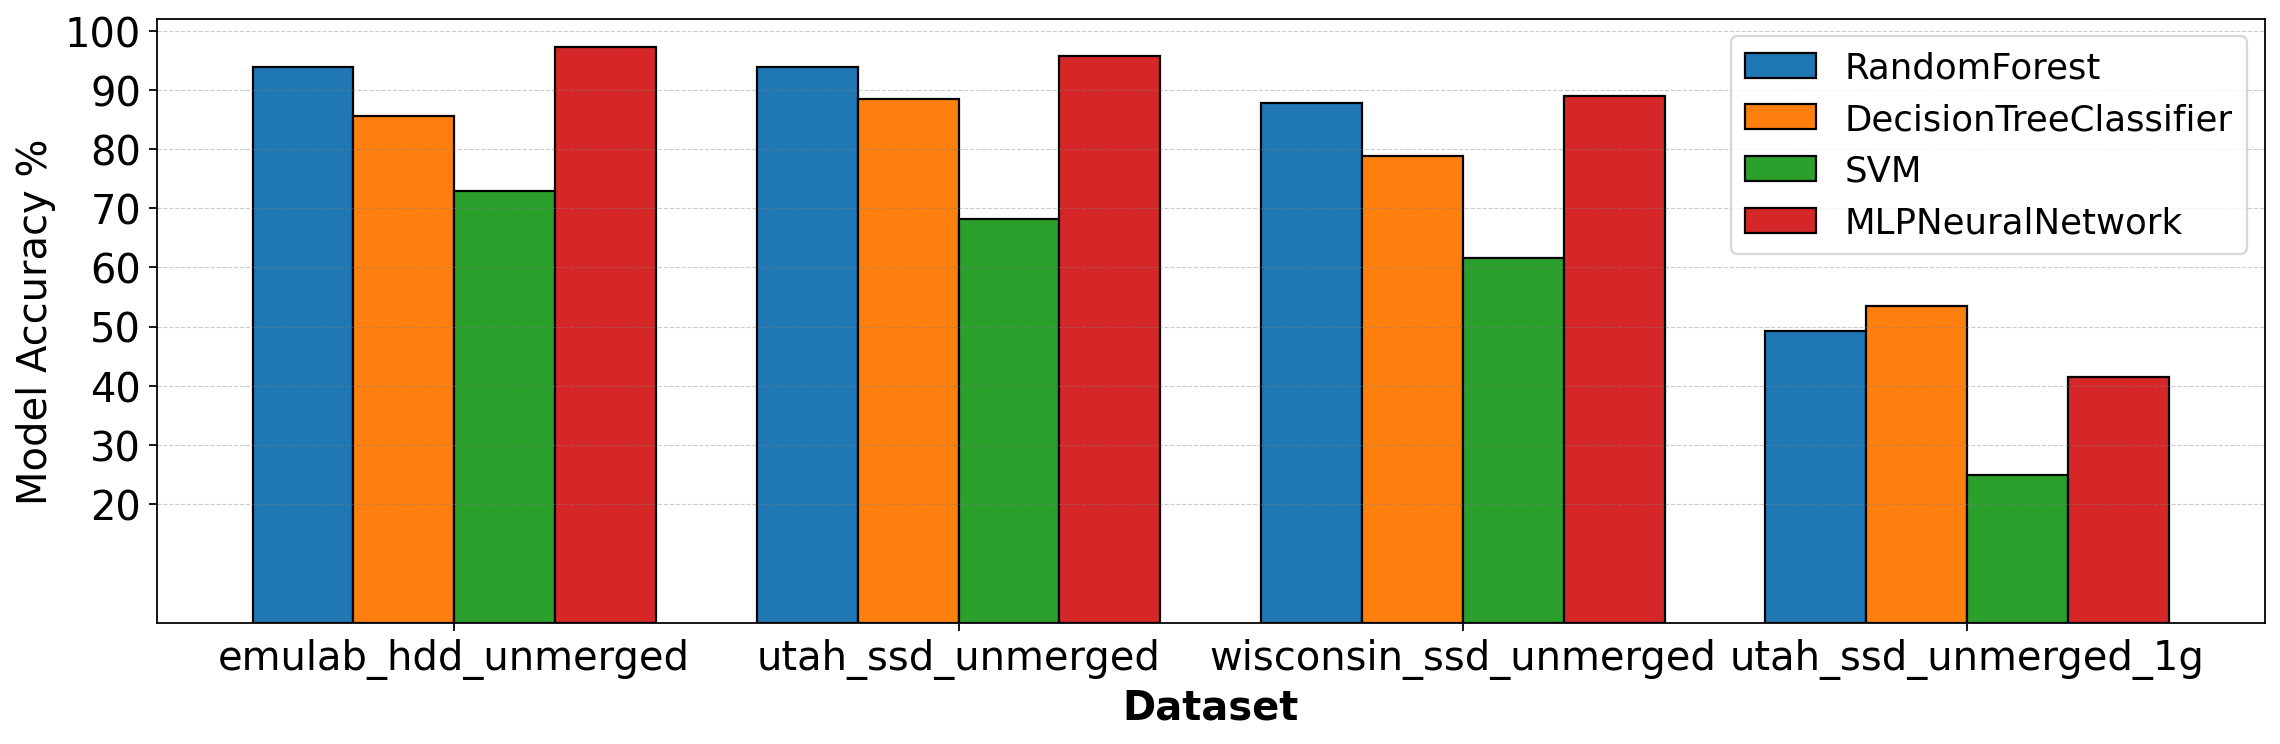

In [161]:
plt.rcParams.update({'font.size': 18})
# Figure Size
fig, ax = plt.subplots(figsize =(17, 5), dpi=160)
barWidth = 0.2

# Set position of bar on X axis
br1 = np.arange(len(datasets))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]

ax.grid(visible = True, axis='y', color ='grey', linestyle ='--', linewidth = 0.5, alpha = 0.4)
ax.set_ylabel('Model Accuracy %')
# ax.set_ylim(ymin=80, ymax=102)


ax.bar(br1, all_accuracies['RandomForest'], width = barWidth, edgecolor ='black', label="RandomForest")
ax.bar(br2, all_accuracies['DecisionTreeClassifier'], width = barWidth, edgecolor ='black', label="DecisionTreeClassifier")
ax.bar(br3, all_accuracies['SVM'], width = barWidth, edgecolor ='black', label="SVM")
ax.bar(br4, all_accuracies['MLPNeuralNetwork'], width = barWidth, edgecolor ='black', label="MLPNeuralNetwork")


plt.xlabel('Dataset', fontweight ='bold')
plt.yticks(np.arange(20, 101, 10))
plt.xticks([r + 0.3 for r in range(len(br1))], datasets)

plt.legend(fontsize = 16)

In [47]:
def grouped_to_5_cat(df, total_possible_labels):
    aggregated_labels = {}
    for i in range(total_possible_labels + 1):
        aggregated_labels[i] = i
    # 0 is normal and is one group itself
    # # group read together
    for i in range(1, 55):
        aggregated_labels.update({i: 1})
    # # group read_congestion_by_sender_sender_ost read levels together
    #     for i in range(1, 10):
    #         aggregated_labels.update({i: 1})
    #     # group read_congestion_by_clients_on_sender_ost read levels together
    #     for i in range(10, 19):
    #         aggregated_labels.update({i: 10})
    #     # group read_congestion_by_receiver_on_receiver_ost read levels together
    #     for i in range(19, 28):
    #         aggregated_labels.update({i: 19})
    #     # group read_congestion_by_clients_on_receiver_ost read levels together
    #     for i in range(28, 37):
    #         aggregated_labels.update({i: 28})
    #     # group read_congestion_by_sender_on_other_ost read levels together
    #     for i in range(37, 46):
    #         aggregated_labels.update({i: 37})
    #     # group read_congestion_by_writer_on_other_ost read levels together
    #     for i in range(46, 55):
    #         aggregated_labels.update({i: 46})
    # group write together
    for i in range(55, 109):
        aggregated_labels.update({i: 55})
    # group networks together
    for i in range(109, 145):
        aggregated_labels.update({i: 109})
    # group tcp configs together
    for i in range(145, 157):
        aggregated_labels.update({i: 145})
    for i in range(157, 161):
        aggregated_labels.update({i: 109})
    y = [aggregated_labels[int(i)] for i in df[df.columns[len(df.columns) - 1]].values]
    df["label_value"] = y
    return df

In [48]:
emulab_hdd_unmerged_5_cat = emulab_hdd_unmerged.copy(deep=True)
df_merged_to_5 = grouped_to_5_cat(emulab_hdd_unmerged_5_cat, 157).drop('time_stamp', axis=1)
print(df_merged_to_5.shape)
print(len(dict(Counter(df_merged_to_5[df_merged_to_5.columns[len(df_merged_to_5.columns) - 1]]))))

(13406, 118)
5


In [49]:
y = df_merged_to_5.label_value
X = df_merged_to_5.drop(columns="label_value") # df[features]
X_train, X_test, y_train, y_test = train_test_split(X,y)
print(X_train.shape)
X_train, y_train = RandomUnderSampler(sampling_strategy="all").fit_resample(X_train, y_train)
print(X_train.shape)

(10054, 117)
(365, 117)


In [50]:
clf= RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(np.round(metrics.accuracy_score(y_test, y_pred) * 100, 2))

97.7


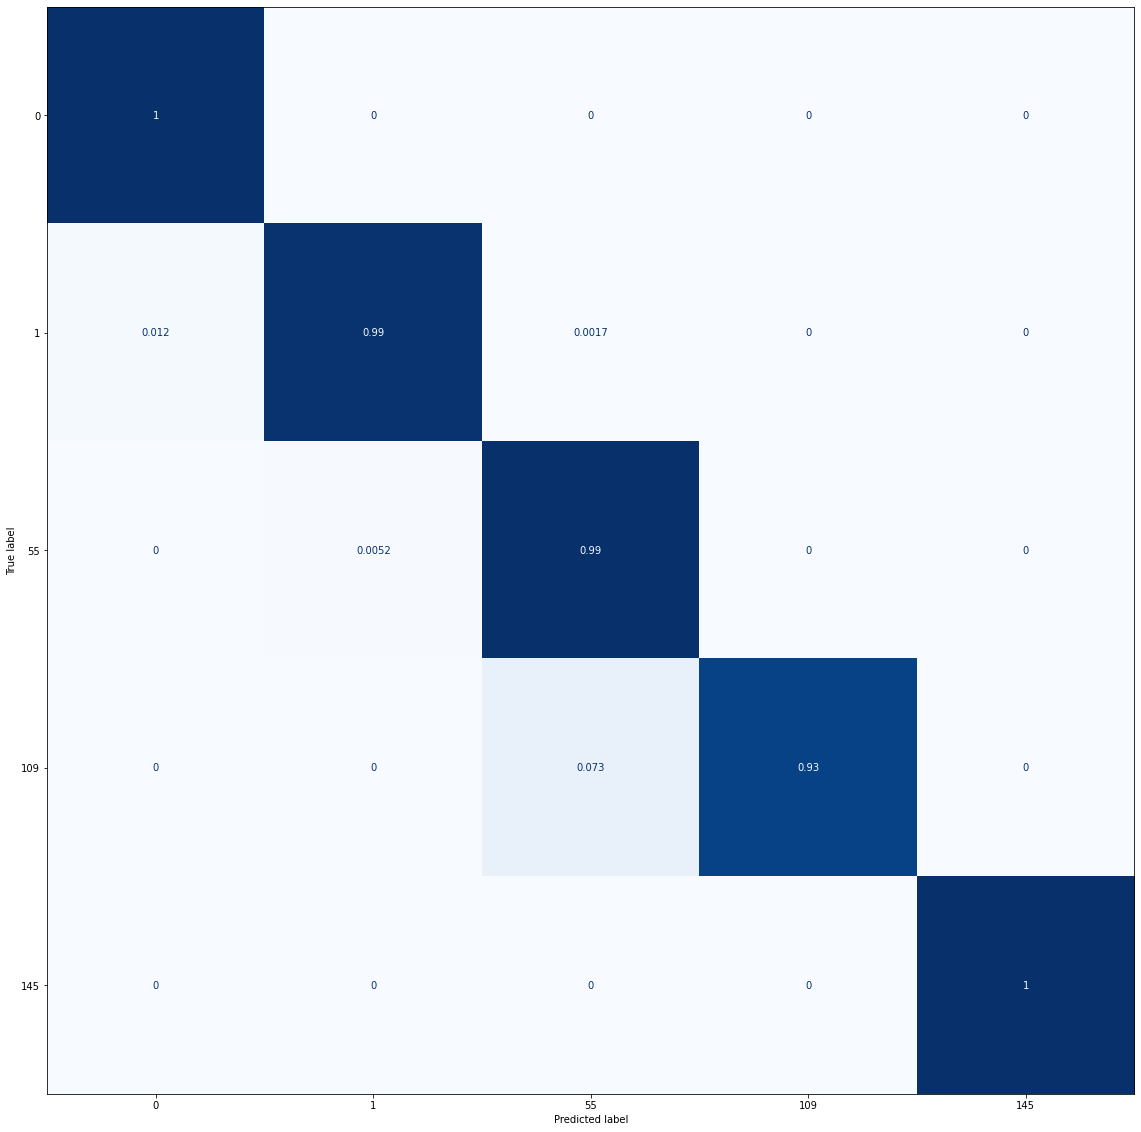

In [51]:
fig, ax = plt.subplots(figsize=(20, 20))
plt.grid(False)
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred,labels=clf.classes_, normalize='true', cmap=plt.cm.Blues, ax=ax, colorbar=False)

In [52]:
score = np.round(clf.feature_importances_, 2)
# print(sorted(list(score), reverse=True))
print("Cummulative Importance Score: \n", np.cumsum(sorted(list(score), reverse=True)))
print(Counter(score))

Cummulative Importance Score: 
 [0.17 0.33 0.39 0.44 0.48 0.51 0.53 0.55 0.57 0.59 0.61 0.63 0.65 0.67
 0.68 0.69 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81
 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95
 0.96 0.97 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98
 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98
 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98
 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98
 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98
 0.98 0.98 0.98 0.98 0.98]
Counter({0.0: 72, 0.01: 31, 0.02: 8, 0.03: 1, 0.04: 1, 0.06: 1, 0.17: 1, 0.05: 1, 0.16: 1})


In [53]:
features = []
for i in range(len(score)):
    if score[i] >= 0.02:
        features.append(X.columns[i])
        # print(df.columns[i])
print(features)
print(len(features))

['sender_cwnd_rate', 'sender_retrans', 'sender_ssthresh_value', 'sender_segs_in', 'sender_tcp_snd_buffer_min', 'sender_tcp_snd_buffer_max', 'sender_avg_waittime_md', 'sender_remote_ost_write_bytes', 'receiver_seg_out', 'receiver_segs_in', 'receiver_write_bytes', 'receiver_avg_waittime_md', 'receiver_system_cpu_percent', 'receiver_remote_ost_write_bytes']
14


In [64]:
y = df_merged_to_5.label_value
X = df_merged_to_5.drop(columns="label_value") # df[features]
X_train, X_test, y_train, y_test = train_test_split(X,y)
print(X_train.shape)
X_train, y_train = RandomUnderSampler(sampling_strategy="all").fit_resample(X_train, y_train)
print(X_train.shape)
print(len(dict(Counter(y))))

(10054, 117)
(335, 117)
5


In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
classifiers = {"Random\nForest": RandomForestClassifier(n_estimators=100),
               "Decision Tree\nClassifier": DecisionTreeClassifier(),
               "SVM": svm.SVC(),
               "MLP\nNeural network": MLPClassifier(),
               "K Neighbors\nClassifier": KNeighborsClassifier(),}
classifiers_legends = list(classifiers.keys())
accuracies = np.zeros(len(classifiers_legends))

for i in range(10):
    temp_acc = np.array([])
    for key in classifiers:
        clf = classifiers[key]
        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracy = np.round(metrics.accuracy_score(y_test, y_pred) * 100, 2)
        temp_acc = np.append(temp_acc, accuracy)
        # accuracies.append(accuracy)
    print(i)
    accuracies = np.add(accuracies, temp_acc)
accuracies = accuracies / 10
print(classifiers_legends)
print(accuracies)

0
1
2
3
4
5
6
7
8
9
['Random\nForest', 'Decision Tree\nClassifier', 'SVM', 'MLP\nNeural network', 'K Neighbors\nClassifier']
[97.562 97.368 87.35  89.027 67.36 ]


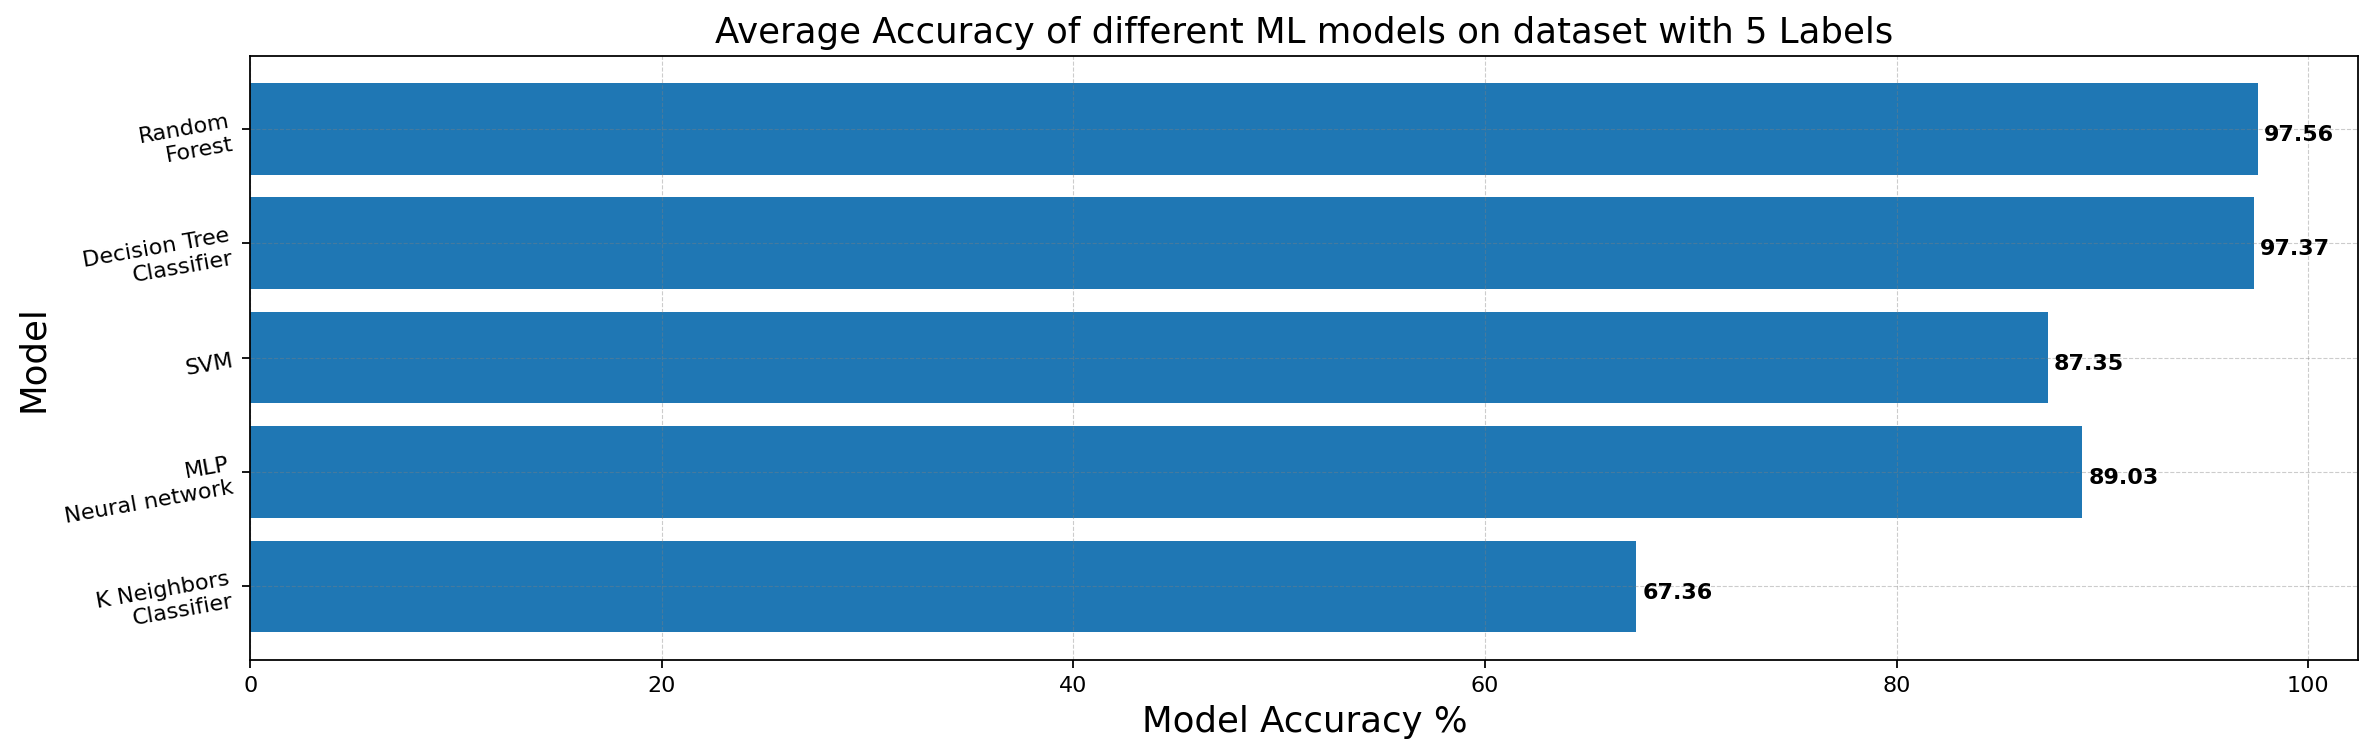

In [66]:
# Figure Size
fig, ax = plt.subplots(figsize =(17, 5), dpi=160)

# Horizontal Bar Plot
ax.barh(classifiers_legends, accuracies)
# Add x, y gridlines
ax.grid(b = True, color ='grey', linestyle ='--', linewidth = 0.5, alpha = 0.4)
ax.set_ylabel('Model', fontsize=16)
ax.set_xlabel('Model Accuracy %', fontsize=16)
ax.set_yticklabels(classifiers_legends, rotation=10)
ax.set_title('Average Accuracy of different ML models on dataset with 5 Labels', fontsize=16)
# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.3, i.get_y()+0.5,str(round((i.get_width()), 2)),fontsize = 10, fontweight ='bold',color ='black')

plt.savefig("Average Accuracy of different ML models on dataset with 5 Labels.jpg")

## Overhead analysis

In [257]:
sender_overhead = pd.read_csv("/Users/ehsan/Documents/phd/cloudLabLogs/14/sender/overhead_logs/overhead_footprints.csv")
receiver_overhead = pd.read_csv("/Users/ehsan/Documents/phd/cloudLabLogs/14/receiver/overhead_logs/overhead_footprints.csv")

In [323]:
sender_overhead.head(n=1)

,1650502921.7842062,0.08577680587768555,0,0.0,0.03302538181840703
0,1.650503e+09,0.101808,0,3.6,0.033056


In [327]:
# Counter(receiver_overhead.iloc[:, 3])
# np.nanstd(receiver_overhead.iloc[:, 3])
np.mean(sender_overhead.iloc[:, 1])

0.09773059404167134

[[3.78093914 4.2501173 ]
 [0.03322708 0.03333845]
 [0.09773059 0.10963107]]


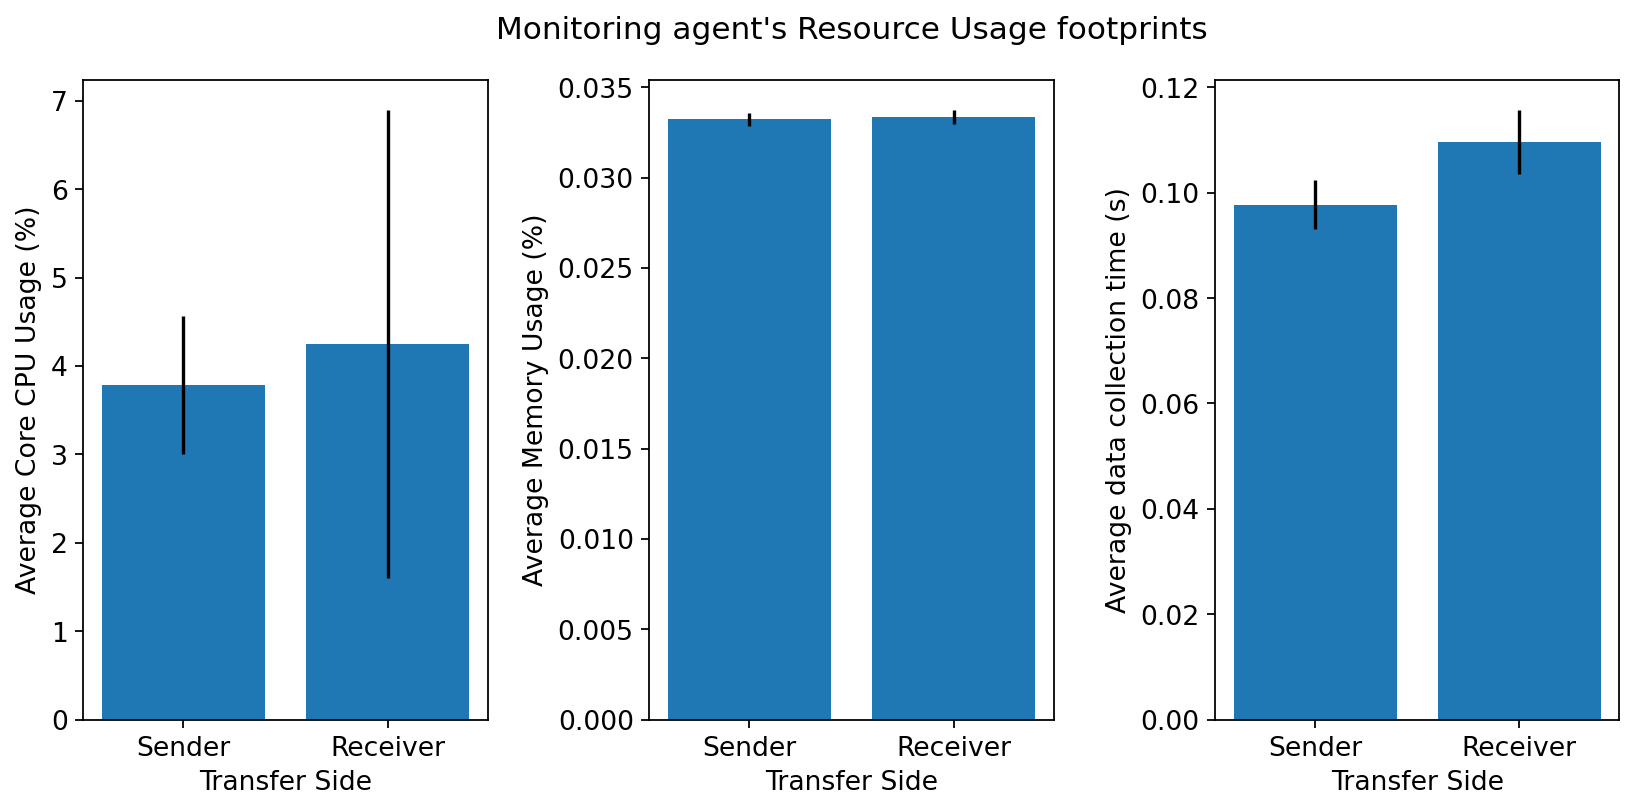

In [329]:
CPU_footprints = np.array([])
CPU_std = np.array([])

Mem_footprints = np.array([])
Mem_std = np.array([])

collection_time = np.array([])
collection_time_std = np.array([])

collection_time = np.append(collection_time, np.mean(sender_overhead.iloc[:, 1]))
collection_time_std = np.append(collection_time_std, np.nanstd(sender_overhead.iloc[:, 1]))
collection_time = np.append(collection_time, np.mean(receiver_overhead.iloc[:, 1]))
collection_time_std = np.append(collection_time_std, np.nanstd(receiver_overhead.iloc[:, 1]))

CPU_footprints = np.append(CPU_footprints, np.mean(sender_overhead.iloc[:, 3]))
CPU_std = np.append(CPU_std, np.nanstd(sender_overhead.iloc[:, 3]))
CPU_footprints = np.append(CPU_footprints, np.mean(receiver_overhead.iloc[:, 3]))
CPU_std = np.append(CPU_std, np.nanstd(receiver_overhead.iloc[:, 3]))


Mem_footprints = np.append(Mem_footprints, np.mean(sender_overhead.iloc[:, 4]))
Mem_std = np.append(Mem_std, np.nanstd(sender_overhead.iloc[:, 4]))
Mem_footprints = np.append(Mem_footprints, np.mean(receiver_overhead.iloc[:, 4]))
Mem_std = np.append(Mem_std, np.nanstd(receiver_overhead.iloc[:, 4]))


data = np.array([CPU_footprints, Mem_footprints, collection_time])
print(data)

fig, axes = plt.subplots(1,3, figsize =(12, 5), dpi=160)
plt.rcParams.update({'font.size': 12})
fig.suptitle('Monitoring agent\'s Resource Usage footprints', fontsize=14)
# plt.title(,loc='left', fontsize=10)
# width = 0.35

axes[0].bar(['Sender', 'Receiver'], data[0], label='Core CPU Usage (%)', yerr=CPU_std)
axes[0].set_ylabel('Average Core CPU Usage (%)')
axes[0].set_xlabel('Transfer Side')
# axes[0].set_yticks(np.arange(0,7,0.5), fontsize=14)

axes[1].bar(['Sender', 'Receiver'], data[1], label='Memory Usage (%)', yerr=Mem_std)
axes[1].set_ylabel('Average Memory Usage (%)')
axes[1].set_xlabel('Transfer Side')

axes[2].bar(['Sender', 'Receiver'], data[2], label='Time (s)', yerr=collection_time_std)
axes[2].set_ylabel('Average data collection time (s)')
axes[2].set_xlabel('Transfer Side')

plt.subplots_adjust(left=0.1,bottom=0.1,  right=0.9,  top=0.9,  wspace=0.4,  hspace=0.4)
# ax.bar(ind + width, data[1], width,  label='Memory Usage(%)')
plt.savefig("Monitoring agent\'s Resource Usage footprints.jpg")
plt.show()